# Data Science From Scratch - Joel Grus
# Chapter 6 - Probability
### Dependence / Independence
Mathematically, if 2 events $E$ and $F$ are independent then the probability that both happen is the product of their probabilities:

> $P(E,F) = P(E)P(F)$

### Conditional Probability
If probabilities of $E$ and $F$ are not necessarily independent, then we write the conditional probability as:

> $P(E | F) = P(E,F) / P(F)$

Or rewritten as:

> $P(E, F) = P(E|F)P(F)$

Which when the 2 are independent, gives:

> $P(E|F) = P(E)$

Given a family with 2 unknown children, probability of:

* Girl, Girl = 1/4
* Girl, Boy = 1/4
* Boy, Girl = 1/4
* Boy, Noy = 1/4

What is probability that both children are girls (B), conditional on the event the older child is a girl (G)? Only the first 2 scenarios remain possible, both are equally likely, therefore 50%:

> $ P(B|G) = P(B,G)/P(G) = P(B)/P(G) = 1/2 $

But the answer is different to the question: what is the probability of the event both children are girls (B) conditional on the event that at least 1 child is a girl (L)?

> $ P(B|L) = P(B,L) / P(L) = P(B) / P(L) = 1/3 $

Because if you know what at least one child is a girl, then it is twice as likely that the family is 1 boy and 1 girl, than it is 2 girls.

This can be checked by generating lots of families:

In [1]:
from numpy import random
def random_kid():
    return random.choice(["boy", "girl"])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger=random_kid()
    older=random_kid()
    if older=="girl":
        older_girl+=1
    if older=="girl" and younger=="girl":
        both_girls+=1
    if older=="girl" or younger=="girl":
        either_girl+=1

        
print("P(both | older): {}".format(both_girls/older_girl))
print("P(both | either): {}".format(both_girls/either_girl))


P(both | older): 0.4976190476190476
P(both | either): 0.3318777292576419


### Bayes' Theorem

Allows us to "reverse" conditional probabilities.

Suppose we need to know the probability of event $E$ conditional on event $F$, but we only know the probability of event $F$ conditional on event $E$.

Definition of conditional probability gives us:
> $P(E|F) = P(E,F)/P(F) = P(F|E)P(E)/P(F)$

The event $F$ can be split into 2 mutually exclusive events:

F *and* E:

> $P(F,E)$

F *not* E:

> $P(F\neg E)$

Then the total probability of $F$ is:

> $P(F)=P(F,E)+P(F\neg E)$

So that:

> $P(E|F) = P(F|E)P(E)/[P(F|E)P(E)+P(F|\neg E)P(\neg E)]$

#### Example

A disease affects 1 in 10000 people. A test for the disease gives the correct result 99% of the time. What does a positive test result mean?

> $T$ means "your test is positive".

> $D$ means "you have the disease".

Then using Bayes' theorum as stated above, the probability that you have the disease conditional on testing positive is:

> $P(D|T) = P(T|D)P(D)/[P(T|D)P(D)+P(T|\neg D)P(\neg D)]$

We already know the probability that someone with the disease tests positive is 99%:

> $P(T|D) = 0.99$

The probability someone has the disease is 1/10000:

>$P(D) = 0.0001$

The probability that someone without the disease tests positive  is 0.01:

>$P(T|\neg D) = 0.01$

And the probability that any person doesn't have the disease is 0.9999:

>$P(\neg D) = 0.9999$

We can plug these numbers into the theorem:

In [2]:
def bayes():
    
    prob_T_on_D = 0.99
    prob_D = 0.0001
    prob_T_not_D = 0.01
    prob_not_D = 0.9999
    prob_D_on_T = prob_T_on_D * prob_D / (prob_T_on_D * prob_D + prob_T_not_D*prob_not_D)
    
    return prob_D_on_T

bayes()

0.00980392156862745

This result means that the probability of having the disease depending on testing positive is 0.98% - less than 1%!!

### Random Variables
A *random variable* is a variable whose possible values have an associated probability distribution. For example a coin flip has a value of heads at probability 0.5 and a value of tails at probability 0.5.

Another example, going back to the earlier example of girls being born in 2 siblings:

If 2 children are born the possible number of girls $X$ has probability:

> No girls 0.25

> 1 girl 0.5

> 2 girls 0.25

If 2 children are born and at least 1 is known to be a girl, the number of girls $Y$ has probability:

> 1 girl 0.66

> 2 girls 0.33

### Continuous Distributions


A coin flip has a *discrete distrubution* of probabilities - it is *either* 0 or 1. But often we want to model probabilities over a *continuum* of outcomes, for example a uniform distribution puts the same probability on all numbers between 0 and 1. Because there are infinity such values, the weight assigned to any individual point is 0. For this reason, probability is represented as a *probability density function* (pdf) which allows you to calculate the probability of seeing a value at a given interval on the scale.

The density function for the uniform distribution is:

In [3]:
def uniform_pdf(x):
    return 1 if x>=0 and x<1 else 0

*Cumulative distribution function*:

In [4]:
def uniform_pdf(x):
    "Returns probability that a uniform variable is <= x"
    if x<0: return 0
    elif x<1: return x
    else: return 1

### Normal Distribution
Classic bell-shaped distribution completely determined by mean (mu - $\mu$) and standard deviation (sigma - $\sigma$).

The distribution function can be implemented as:

In [5]:
import math
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

Implemented and plotted as:

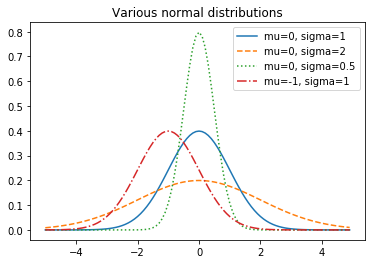

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

xs = [x/10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], "-", label = "mu=0, sigma=1")
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], "--", label = "mu=0, sigma=2")
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ":", label = "mu=0, sigma=0.5")
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], "-.", label = "mu=-1, sigma=1")
plt.legend()
plt.title("Various normal distributions")
plt.show()

When $\mu$=0 and $\sigma$=1 this is called the *standard normal distribution*.

Now plotted as a *cumulative distribution function*:

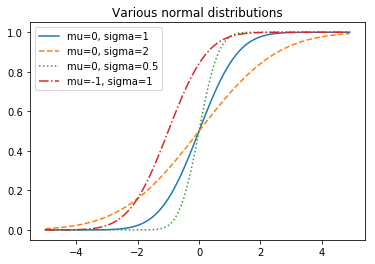

In [7]:
def normal_cdf(x, mu=0, sigma=1):
    # Using Python's math.erf
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

xs = [x/10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], "-", label = "mu=0, sigma=1")
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], "--", label = "mu=0, sigma=2")
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ":", label = "mu=0, sigma=0.5")
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], "-.", label = "mu=-1, sigma=1")
plt.legend()
plt.title("Various normal distributions")
plt.show()

If we want to invert the cdf to find the value corresponding to a given probability this can be done using binary search (no "simple" way of doing this):

In [8]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """Find approximate inverse using binary search"""
    
    # If not standard, compute standard and rescale.
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_csf(p, tolerance = tolerance)
    
    low_z, low_p = -10.0, 0
    hi_z, hi_p = 10.0, 1
    
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        
        if mid_p < p:
            # Midpoint too low, search above it.
            low_z, low_p = mid_z, mid_p
        
        elif mid_p > p:
            # Midpoint too high, search below it.
            hi_z, hi_p = mid_z, mid_p
        
        else:
            break
    
    return mid_z

["p:{}, inverse cdf:{}".format(p/10.0,inverse_normal_cdf(p/10.0)) for p in range(0, 10)]

['p:0.0, inverse cdf:-8.75',
 'p:0.1, inverse cdf:-1.2815570831298828',
 'p:0.2, inverse cdf:-0.8416271209716797',
 'p:0.3, inverse cdf:-0.5243968963623047',
 'p:0.4, inverse cdf:-0.2533435821533203',
 'p:0.5, inverse cdf:0.0',
 'p:0.6, inverse cdf:0.2533435821533203',
 'p:0.7, inverse cdf:0.5243968963623047',
 'p:0.8, inverse cdf:0.8416271209716797',
 'p:0.9, inverse cdf:1.2815570831298828']

### Central Limit Theorem
CLT is what makes normal distribution so useful: take enough sample populations from a random variable and you will find that the samples are themselves approximately normally distributed.

#### Example (not from the book): Say you wanted to study height.

You go to a city and randomly take samples of 10 people's height in the street, many times over. Each sample itself wouldn't necessarily be normally distributed (it may be, but the sample size is probably too low). However if you took thousands of samples of 10 people's height, then you would find that the *average* heights of each 10 person sample would start to look normally distributed. We can replicate this programatically.

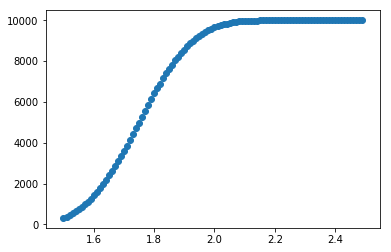

In [9]:
def persons_height():
    """Randomly generate the height of 1 'person', from a minimum of 1m to maximum of 2.5m"""
    return 1 + (random.rand() * 1.5)

def sample_10():
    """Returns average height of 10 'people' randomly sampled."""
    heights = 0
    for x in range(10):
        heights += persons_height()
    
    return heights/10.0

# Now randomly sample 10000 populations of 10 'people'.
samples_10000 = [sample_10() for s in range(10000)]

# Now 'bucket' the people at intervals of 1cm and plot.
# It should resemble the cumulative density function plotted earlier.
buckets = [cm/100 for cm in range(150,250)]
av_height_counts = []
for height in buckets:
    samples_below_height = len([s for s in samples_10000 if s < height])
    av_height_counts.append(samples_below_height)
plt.scatter(x = buckets, y = av_height_counts)
plt.show()

#### From the book:
If $x_{1} ... x_{n}$ are random variables with mean $\mu$ and standard deviation $\sigma$, and $n$ is large then:

\begin{equation*}
\frac{1}{n}(x_{1} + \cdots + x_{n})
\end{equation*}

is approximately normally distributed with mean $\mu$ and standard deviation $\sigma$/$\sqrt n$.

Or alternatively:

\begin{equation*}
\frac{(x_{1} + \cdots + x_{n}) - \mu n}{\sigma \sqrt n}
\end{equation*}

is approximately normally distributed with mean 0 and std. dev. 1.

Demonstrated with Bernoulli random variables:

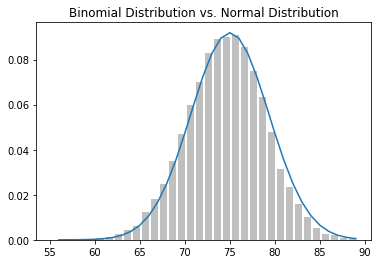

In [10]:
from collections import Counter

def bernoulli_trial(p):
    """Returns 1 with probability p, and 0 with probability 1 - p"""
    return 1 if random.random() < p else 0

def binomial(n, p):
    """Runs a Bernoulli trial on probability p n times."""
    return sum(bernoulli_trial(p) for _ in range(n))
    
def make_hist(p, n, num_points):
    
    data = [binomial(n, p) for _ in range(num_points)]
    
    # Bar chart to show actual binomial samples.
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
           [v / num_points for v in histogram.values()],
           0.8,
           color="0.75")
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    # Line chart to show normal approximation.
    xs = range(min(data), max(data)+1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma) for i in xs]
    plt.plot(xs, ys)
    
    plt.title("Binomial Distribution vs. Normal Distribution")
    plt.show()
    
make_hist(0.75, 100, 10000)

Therefore if you want to know probability that a coin turns up 60 heads in 100 flips you can estimate it by calculating if a Normal Distribution of $\mu = 50, \sigma = 5 $ is greater than 60; as an easier alternative to computing the Binomial(100, 0.5) cdf.

#### Further reading
* <a href="https://docs.scipy.org/doc/scipy/reference/stats.html" target="_blank">Scipy Stats</a>.
* <a href="http://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/amsbook.mac.pdf" target="_blank">Introduction to probability</a>.